Work with the deepstack face API. 

In [14]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
IP_ADDRESS = 'localhost'
PORT = '5000'
API_KEY = "Mysecretkey"
TIMEOUT = 30 # Default is 10

## Face API

In [16]:
dsface = ds.DeepstackFace(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

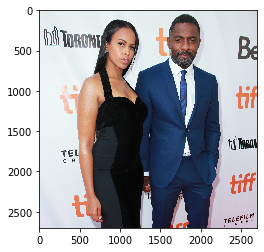

In [17]:
image_path = 'tests/images/couple.jpg'

plt.imshow(Image.open(image_path));

## Face detection
Detect faces, but do not recognise them, quite fast.

In [18]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 5.04 ms, sys: 7.95 ms, total: 13 ms
Wall time: 3.01 s


Access the predictions

In [19]:
dsface.predictions

[{'confidence': 0.9999846,
  'y_min': 162,
  'x_min': 1620,
  'y_max': 680,
  'x_max': 1982},
 {'confidence': 0.99997175,
  'y_min': 230,
  'x_min': 867,
  'y_max': 729,
  'x_max': 1199}]

In [20]:
len(dsface.predictions)

2

## Register a face
Post a name and a close up photo of a face

In [21]:
%%time
try:
    with open('tests/images/idris.jpg', "rb") as image_bytes:
        dsface.register_face("idris", image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 4.81 ms, sys: 9.05 ms, total: 13.9 ms
Wall time: 2.99 s


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [22]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.recognise(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 4.37 ms, sys: 2.84 ms, total: 7.21 ms
Wall time: 3.87 s


## Helper functions
The package provides helper functions for extracting info out of deepstack predictions.

Get recognised faces and their probability (%)

In [23]:
ds.get_recognised_faces(dsface.predictions)

{'Idris Elba': 74.7}